## Analyze the crowdsourced short text answers 

In [ ]:
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_trf")

df = pd.read_csv("data/clean_answers.csv", index_col="batch")

# preprocess data
df["answer_raw"] = df.answer
df["answer"] = df.answer_raw.map(nlp)

### STA sizes per batch

Text(0, 0.5, 'Size in tokens')

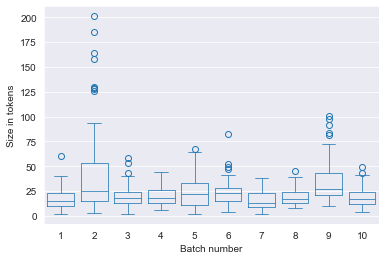

In [3]:
import seaborn as sns

sizes = df.answer.str.len().reset_index()

sns.set_style("darkgrid")

g = sns.boxplot(sizes.reset_index(), x="batch", y="answer", fill=False, linewidth=0.75)
g.set_xlabel("Batch number")
g.set_ylabel("Size in tokens")

### STA sizes per participant

<Axes: xlabel='Size in tokens', ylabel='Batch-Annotator'>

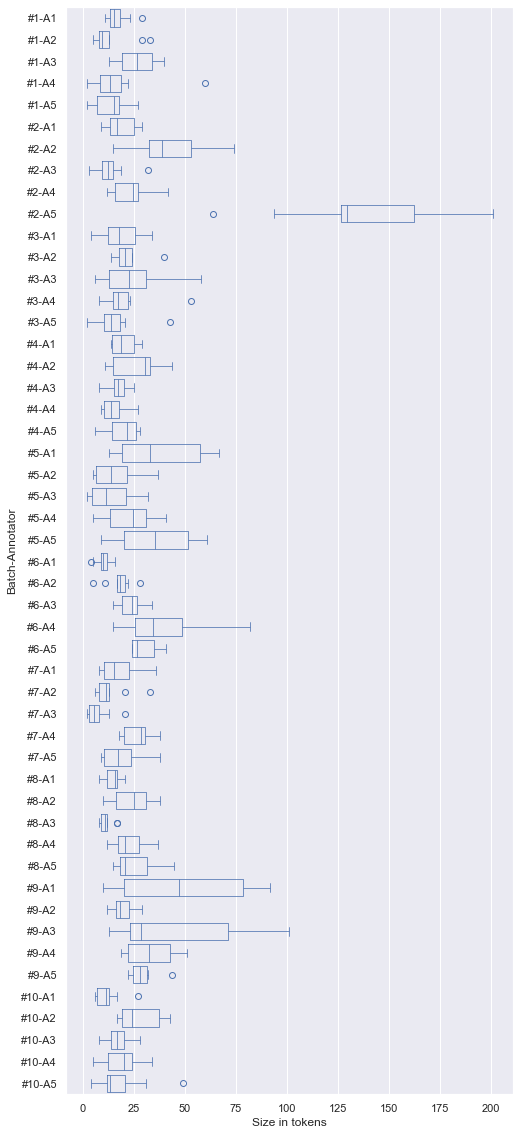

In [ ]:
sizes = df[["annotator", "answer"]].reset_index()
sizes["size"] = sizes.answer.str.len()
sizes["label"] = (
    "#"
    + sizes.batch.astype(str)
    + "-A"
    + sizes.annotator.shift(fill_value=0).mod(5).add(1).astype(str)
)


sns.set_theme(rc={"figure.figsize": (8, 20)})

g = sns.boxplot(
    sizes.reset_index(),
    x="size",
    y="label",
    fill=False,
    linewidth=0.75,
    orient="h",
)

g.set_ylabel("Batch-Annotator")
g.set_xlabel("Size in tokens")
g

### Difficulty ratings

/Users/simonjetz/.local/share/virtualenvs/clustering-9qBh_5qX/lib/python3.9/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


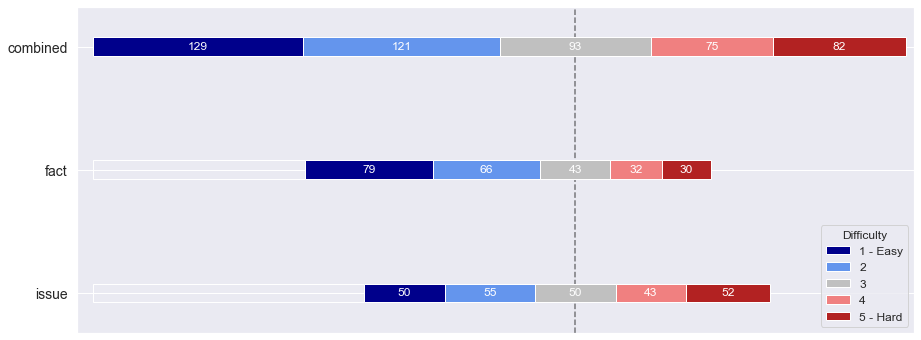

In [ ]:
import plot_likert
import numpy as np

sns.set_theme(rc={"figure.figsize": (15, 6)})
FONTSIZE = 18

# configure likert plot
scale = ["1 - Easy", "2", "3", "4", "5 - Hard"]
palette = plot_likert.colors.default_with_darker_neutral
neutral, *colors_ = palette.copy()
colors = [neutral, *colors_[::-1]]

frame = (
    df.set_index("shellnoun")
    .difficulty.map(dict(enumerate(scale, start=1)))
    .to_frame("combined")
).reset_index()
frame = frame.assign(**frame.pivot(columns="shellnoun", values="combined")).drop(
    "shellnoun", axis=1
)

ax = plot_likert.plot_likert(
    frame,
    plot_scale=scale,
    colors=colors,
    width=0.15,
)
ax.xaxis.set_visible(False)

ax.legend(title="Difficulty", fontsize=FONTSIZE - 6, title_fontsize=FONTSIZE - 6)

# add bar labels
for bars in ax.containers[1:]:
    ax.bar_label(bars, label_type="center", fontsize=FONTSIZE - 6, color="white")

ax.tick_params(labelsize=FONTSIZE - 4)